In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
x = df.iloc[:,:-1].values 
y = df.iloc[:,-1].values
print("Sample x:",  x[0:5,:])
print("Sample y: ", y[0:5])

Sample x: [[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]]
Sample y:  [0.2 0.2 0.2 0.2 0.2]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3,random_state=42)

In [ ]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [ ]:
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        if (epoch%(epochs/10)==0):
            print("Cost at epoch",epoch,"is:",cost)
    return w, b, cost_list

In [ ]:
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=10000)

Cost at epoch 0 is: 1.0356497088882322
Cost at epoch 1000 is: 0.05060955019489861
Cost at epoch 2000 is: 0.032254682767728936
Cost at epoch 3000 is: 0.0281681994011174
Cost at epoch 4000 is: 0.02539564375707594
Cost at epoch 5000 is: 0.023371184882791773
Cost at epoch 6000 is: 0.021888684103726706
Cost at epoch 7000 is: 0.020802925200709435
Cost at epoch 8000 is: 0.02000772923463163
Cost at epoch 9000 is: 0.019425337717675205


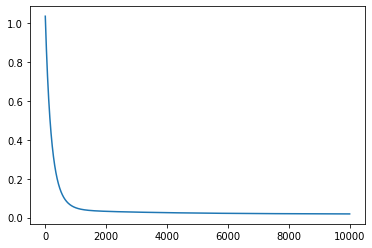

In [ ]:
plt.plot(c)

In [ ]:
def predict(X, w, b):
    return X.dot(w) + b

In [ ]:
y_pred = predict(Xtest, w, b)

In [ ]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    r2 = 1 - (rss / tss)
    return r2

In [ ]:
r2score(y_pred, Ytest)

0.9445624608313969